# K-Nearest Neighbors (KNN) and Linear Classifier Tutorial

In this tutorial, we will implement two fundamental classification algorithms:
1. **K-Nearest Neighbors (KNN)**: A simple, instance-based learning algorithm.
2. **Linear Classifier**: One of the simplest machine learning models used for classification.

## Objectives:
- Generate two dimensional synthetic data
- Download and subsample CIFAR dataset
- Implement KNN and Linear Classifiers from scratch.
- Use `scikit-learn` to apply both classifiers to a dataset.
- Visualize decision boundaries and evaluate model performance.

Refrences: https://cs231n.github.io/classification/

## Install SKLEARN

In [6]:
# In our ML server we dont have preinstalled sklearn, so you may want to run this to install!!
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\minnb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Import Library

In [7]:
#Import Necessary Library
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from torchvision.datasets import CIFAR10

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
from scipy.spatial import distance

# Using the default libraries function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Generating and Visualizing the Synthetic data points

In [8]:
# Generating synthetic dataset
X_syn, y_syn = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)

In [9]:
# To get unique values in y
unique_train_classes = np.unique(y_train_syn)
unique_test_classes = np.unique(y_test_syn)
print(unique_train_classes)

# Check if the unique classes in both arrays are equal
assert np.array_equal(unique_train_classes, unique_test_classes), "Unique classes in train and test sets are different."
# NumPy arrays do not support direct comparison for equality! Instead we should use array_equal function!

[0 1]


In [10]:
X_train_syn[0] , y_train_syn[0]

(array([-0.18255715, -2.46164759]), 0)

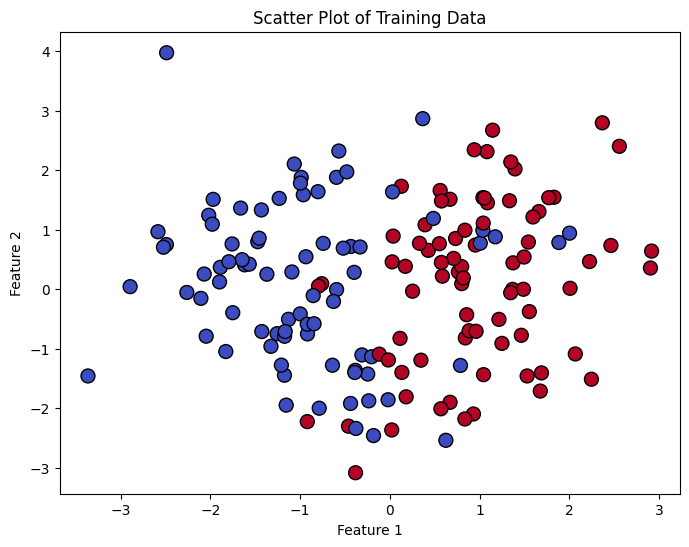

In [11]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_syn[:, 0], X_train_syn[:, 1], c=y_train_syn, cmap='coolwarm', edgecolor='k', s=100)
plt.title("Scatter Plot of Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

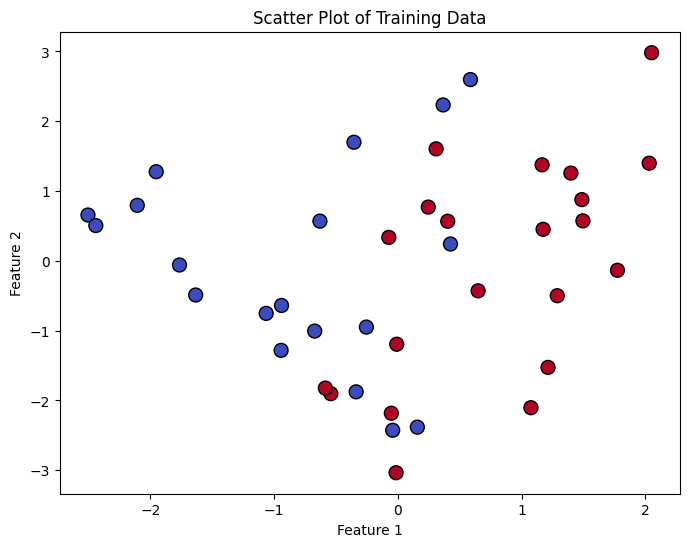

In [12]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_syn[:, 0], X_test_syn[:, 1], c=y_test_syn, cmap='coolwarm', edgecolor='k', s=100)
plt.title("Scatter Plot of Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# K-Nearest Neighbors (KNN) Classifier Tutorial

## Background

The K-Nearest Neighbors (KNN) classifier is a straightforward and intuitive machine learning algorithm used for classification tasks. It operates based on the principle of finding the 'K' closest training examples in the feature space to a given test example and classifying it based on the majority class among these 'K' neighbors.

### Key Concepts

- **Distance Metric**: KNN uses distance metrics to find the closest neighbors. Common distance metrics include:

  - **Euclidean Distance**: Measures the straight-line distance between two points.
  - **Manhattan Distance**: Measures the distance between two points along axes at right angles.
  - **Minkowski Distance**: Generalization of both Euclidean and Manhattan distances.


- **Choosing K**: The value of 'K' determines how many neighbors are considered for classifying a test instance:

  - **Small K**: Can make the model sensitive to noise in the data.
  - **Large K**: Can make the model less sensitive to local patterns and more computationally expensive.


- **Lazy Learning**: KNN is a lazy learner because it does not build a model during the training phase. Instead, it stores the training dataset and performs computation during the testing phase.

## Implementation

In this tutorial, we will:

1. Implement a custom KNN classifier.
2. Train and evaluate the classifier.


In [13]:
# Custom KNN Classifier
class CustomKNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # If x or x_train are tensors on the GPU, move them to CPU first
            x_cpu = x.cpu().numpy() if isinstance(x, torch.Tensor) else x
            distances = [distance.euclidean(x_cpu, x_train.cpu().numpy() if isinstance(x_train, torch.Tensor) else x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]

            k_nearest_labels = [self.y_train[i].cpu().numpy() if isinstance(self.y_train[i], torch.Tensor) else self.y_train[i] for i in k_indices]  # Convert labels if they are tensors
            most_common = np.bincount(k_nearest_labels).argmax()
            y_pred.append(most_common)
        return np.array(y_pred)

In [14]:
# Training the KNN
knn = CustomKNNClassifier(k=5)
knn.fit(X_train_syn, y_train_syn)

# Predicting
y_pred = knn.predict(X_test_syn)

# Evaluation
print("Custom KNN Accuracy:", accuracy_score(y_test_syn, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_syn, y_pred))

Custom KNN Accuracy: 0.8
Confusion Matrix:
 [[15  4]
 [ 4 17]]


In [15]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.show()

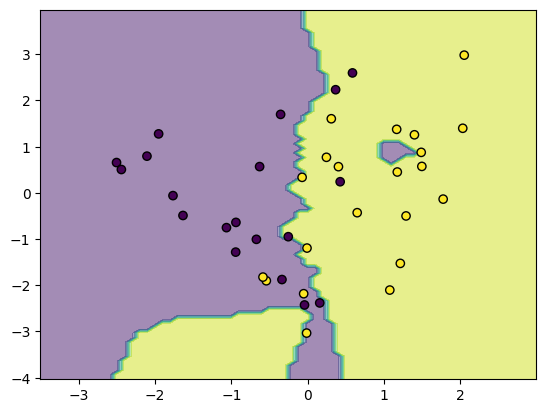

In [16]:
# Plotting decision boundary for KNN
plot_decision_boundary(knn, X_test_syn, y_test_syn)

## IN PUFFER, To download from outside(except intranet) we need to connect to a proxy ip.

In [17]:
# # For our puffer surver we need to browse via a proxy!!

# # Set HTTP and HTTPS proxy
# os.environ['http_proxy'] = 'http://192.41.170.23:3128'
# os.environ['https_proxy'] = 'http://192.41.170.23:3128'

# Omitted since I was running on my local machine

In [18]:
# Check if GPU is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu") # NumPy and Tensor errors
print(f"Using device: {device}")

Using device: cpu


In [19]:
!nvidia-smi

Fri Sep 20 16:24:27 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 556.12                 Driver Version: 556.12         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   56C    P8              4W /   38W |       0MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [20]:
print("GPU available: ", torch.cuda.is_available())
print("Number of GPUs: ", torch.cuda.device_count())

GPU available:  True
Number of GPUs:  1


In [21]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Sep__8_19:56:38_Pacific_Daylight_Time_2023
Cuda compilation tools, release 12.3, V12.3.52
Build cuda_12.3.r12.3/compiler.33281558_0


In [22]:
# LETS GET OUR HAND DIRTY ON IMAGE DATA NOW!!

In [23]:
# Desired mean and standard deviation for the normalization of inputs!
mean = 0.0
stddev = 1.0

# Define Transformation for input image. You may be able to use many more transform using this.
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((mean), (stddev))])

# This is equivalent to standard scalar funtion from sklearn.preprocessing But you can define own

In [24]:
cifar_train = datasets.CIFAR10('./data', train=True, download=True ,transform=transforms.ToTensor())
cifar_test = datasets.CIFAR10('./data', train=False, download=True ,transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


Training data: 50000
Test data: 10000
Image shape: torch.Size([3, 32, 32])


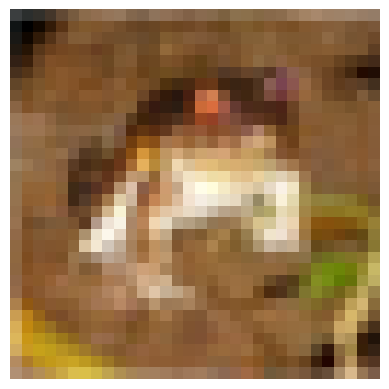

label: frog


In [25]:
print(f"Training data: {len(cifar_train)}")
print(f"Test data: {len(cifar_test)}")

image, label = cifar_train[0]
# Now you can check the shape of the image
print(f"Image shape: {image.shape}")
# If the image is in [C, H, W] format, we need to permute it to [H, W, C] for displaying
image_np = image.permute(1, 2, 0).cpu().numpy()

# Ensure it's in the right range [0, 255] for displaying
image_np = (image_np * 255).astype('uint8')

# Display the image
plt.imshow(image_np)
plt.axis('off')  # Turn off axis labels
plt.show()

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"label: {classes[label]}")

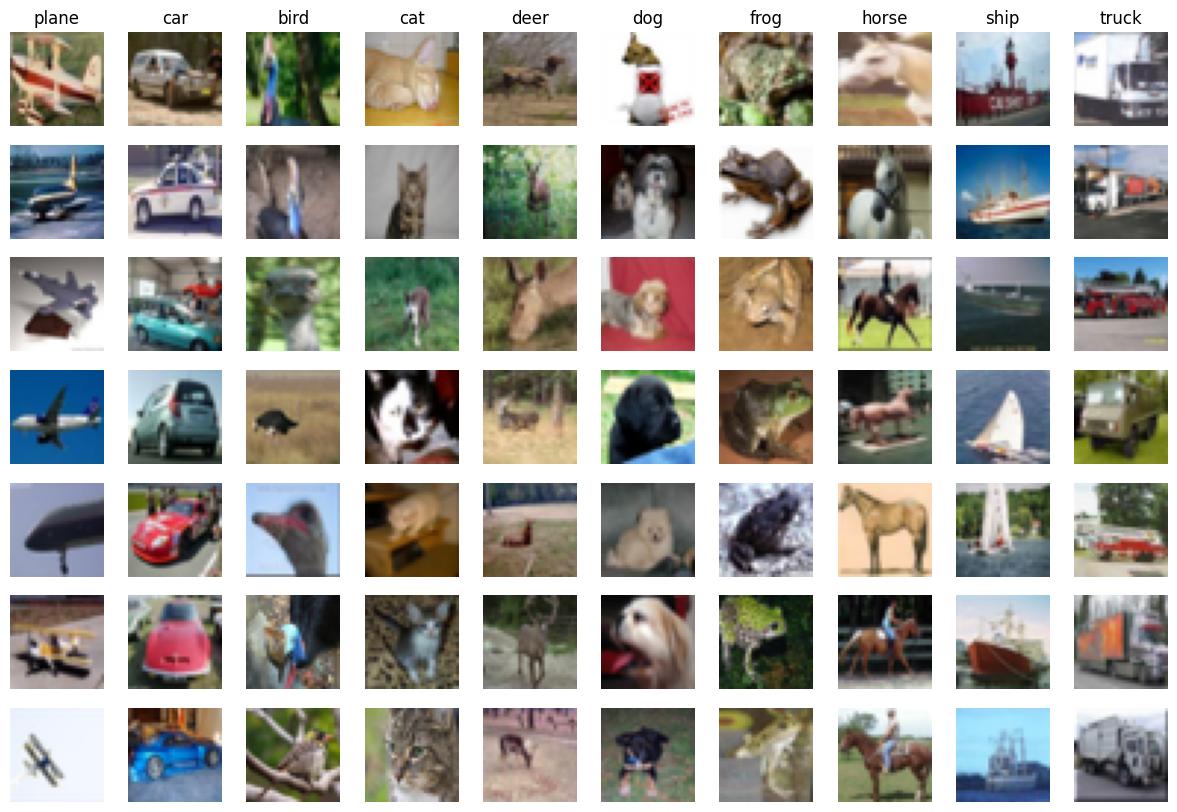

In [26]:
# Classes of CIFAR DATA
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7


# Collect labels and images for the CIFAR dataset
images, labels = [], []
for image, label in cifar_train:
    images.append(image)
    labels.append(label)

images = torch.stack(images)
labels = torch.tensor(labels)

# Now plotting the samples
plt.figure(figsize=(15, 10))  # Adjust the width and height to your preference

for y, cls in enumerate(classes):
    # Find indices of samples belonging to class `y`
    idxs = np.flatnonzero(labels == y)
    # Randomly choose some sample indices
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        # Convert tensor to NumPy and plot
        img_np = (images[idx].permute(1, 2, 0).cpu().numpy()*255).astype('uint8')  # Convert from [C, H, W] to [H, W, C]
        plt.imshow(img_np)
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

## USE A PART OF DATA (SUBSAMPLING)

In [27]:
# Function to subsample CIFAR-10 dataset
def subsample_dataset(dataset, sample_size=1000):
    indices = np.random.choice(len(dataset), sample_size, replace=False)
    subset = Subset(dataset, indices)
    return subset

# Subsample the training and test datasets
sample_size = 1000
train_subset = subsample_dataset(cifar_train, sample_size=sample_size)
test_subset = subsample_dataset(cifar_test, sample_size=int(sample_size * 0.4))

# Load data into PyTorch DataLoader
train_loader = DataLoader(train_subset, batch_size=sample_size, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=int(sample_size * 0.4), shuffle=False)

# Fetch all data and labels for easier handling
X_train, y_train = next(iter(train_loader))
X_test, y_test = next(iter(test_loader))

print("Before Flattening")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Reshape the images to 2D for the KNN algorithm
X_train = X_train.view(X_train.size(0), -1).to(device)  # Flatten
X_test = X_test.view(X_test.size(0), -1).to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

print("After Flattening")
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Before Flattening
Training data shape: torch.Size([1000, 3, 32, 32])
Test data shape: torch.Size([400, 3, 32, 32])
After Flattening
Training data shape: torch.Size([1000, 3072])
Test data shape: torch.Size([400, 3072])


In [28]:
# Initialize and train custom KNN classifier
knn = CustomKNNClassifier(k=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
# Ensure y_test and y_pred are on CPU and converted to NumPy arrays
y_test_cpu = y_test.cpu().numpy() if isinstance(y_test, torch.Tensor) else y_test
y_pred_cpu = y_pred.cpu().numpy() if isinstance(y_pred, torch.Tensor) else y_pred

# Calculate accuracy
accuracy = accuracy_score(y_test_cpu, y_pred_cpu)
print(f"Accuracy of Custom KNN Classifier: {accuracy:.2f}")

Accuracy of Custom KNN Classifier: 0.20


## USING SKLEARN KNeighborsClassifier

In [29]:
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)

# Predicting
y_pred_sklearn = knn_sklearn.predict(X_test)

# Evaluation
print("sklearn KNN Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Confusion Matrix (sklearn KNN):\n", confusion_matrix(y_test, y_pred_sklearn))

sklearn KNN Accuracy: 0.205
Confusion Matrix (sklearn KNN):
 [[20  1  5  0  1  0  1  0  5  0]
 [13  2  5  2  5  0  7  1  3  1]
 [10  0 25  1  9  0  5  1  3  0]
 [11  0 13  6 12  0  2  0  0  0]
 [ 6  0 24  2  5  0  2  0  0  0]
 [15  0 12  1  9  1  5  0  0  0]
 [ 4  0 21  1  3  1  6  1  0  0]
 [10  0  8  3  7  0  4  3  1  1]
 [10  0  4  2  1  1  1  0 12  0]
 [13  2 10  0  4  0  0  2 10  2]]


## (kNN was developed in 1951).

In particular, note that images that are nearby each other are much more a function of the general color distribution of the images, or the type of background rather than their semantic identity. For example, a dog can be seen very near a frog since both happen to be on white background. Ideally we would like images of all of the 10 classes to form their own clusters, so that images of the same class are nearby to each other regardless of irrelevant characteristics and variations (such as the background). However, to get this property we will have to go beyond raw pixels.

# TAKE_HOME EXERCISE : [20 points] 

### FIND THE BEST K USING CROSS VALIDATION

# Initialize parameters
Input: 

    - X_train (training data)
    - y_train (training labels)
    - K_values (list of K values to evaluate, e.g., [1, 3, 5, 7, 9])
    - num_folds (number of folds for cross-validation)

Step 1: Split the training data into 'num_folds' folds for cross-validation

    - Split X_train and y_train into 'num_folds' parts (folds)

Step 2: Initialize a dictionary to store validation accuracy for each K

    - Create a dictionary 'accuracy_scores' where key = K value, value = list of accuracies for each fold

Step 3: For each K in K_values

    For K in K_values:
    
        Initialize an empty list to store accuracies for current K

        Step 3.1: Perform K-Fold cross-validation
        
        For each fold:
            - Use current fold as the validation set
            - Use the remaining folds as the training set

        Step 3.2: Train a KNN classifier on the training set for the current fold
        
                - Fit KNN with K neighbors using the training set

        Step 3.3: Predict labels on the validation set
        
                - Predict the labels for the current fold’s validation set

        Step 3.4: Calculate accuracy
        
                - Compare predicted labels with actual labels of the validation set
                - Calculate accuracy and store in the accuracy list for current K

        Step 3.5: After completing all folds for the current K
        
            - Compute the average accuracy for current K
            - Store the average accuracy in 'accuracy_scores' dictionary

Step 4: Find the K with the highest average accuracy

    - Find the key (K value) in 'accuracy_scores' with the highest average accuracy

Output:
    - The K value with the highest accuracy
    - The corresponding accuracy score


In [3]:
# Your code goes here !
import torch
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from torchvision import datasets, transforms
from sklearn.neighbors import KNeighborsClassifier
from torch.utils.data import Subset, DataLoader


def subsample_dataset(dataset, sample_size):
    indices = np.random.choice(len(dataset), sample_size, replace=False)
    return Subset(dataset, indices)

mean = 0.0
stddev = 1.0

# Define Transformation for input image. You may be able to use many more transform using this.
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((mean), (stddev))])

train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

sample_size = 10000  
train_subset = subsample_dataset(train_data, sample_size=sample_size)

train_loader = DataLoader(train_subset, batch_size=sample_size, shuffle=True)

X_train, y_train = next(iter(train_loader))

X_train = X_train.view(X_train.size(0), -1).numpy()
y_train = y_train.numpy()

K_values = [1, 3, 5, 7, 9] 
num_folds = 5

# Step 1: Split the training data into 'num_folds' folds for cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

# Step 2: Initialize a dictionary to store validation accuracy for each K
accuracy_scores = {k: [] for k in K_values}

# Step 3: For each K in K_values
for k in K_values:
    print(f"Evaluating for K = {k}")
    
    # Step 3.1: Perform K-Fold cross-validation
    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
        # Use current fold as the validation set
        # Use the remaining folds as the training set
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
        # Step 3.2: Train a KNN classifier on the training set for the current fold
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)
        
        # Step 3.3: Predict labels on the validation set
        y_pred_fold = knn.predict(X_val_fold)
        
        # Step 3.4: Calculate accuracy
        fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
        accuracy_scores[k].append(fold_accuracy)
        
        print(f"  Fold {fold + 1} accuracy: {fold_accuracy:.4f}")
    
    # Step 3.5: After completing all folds for the current K
    avg_accuracy = np.mean(accuracy_scores[k])
    print(f"Average accuracy for K = {k}: {avg_accuracy:.4f}\n")

# Step 4: Find the K with the highest average accuracy
best_k = max(accuracy_scores, key=lambda k: np.mean(accuracy_scores[k]))
best_accuracy = np.mean(accuracy_scores[best_k])

print(f"Best K value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

Files already downloaded and verified
Evaluating for K = 1
  Fold 1 accuracy: 0.2935
  Fold 2 accuracy: 0.2890
  Fold 3 accuracy: 0.2980
  Fold 4 accuracy: 0.2805
  Fold 5 accuracy: 0.2860
Average accuracy for K = 1: 0.2894

Evaluating for K = 3
  Fold 1 accuracy: 0.2815
  Fold 2 accuracy: 0.2815
  Fold 3 accuracy: 0.2665
  Fold 4 accuracy: 0.2820
  Fold 5 accuracy: 0.2740
Average accuracy for K = 3: 0.2771

Evaluating for K = 5
  Fold 1 accuracy: 0.3065
  Fold 2 accuracy: 0.2775
  Fold 3 accuracy: 0.2715
  Fold 4 accuracy: 0.2895
  Fold 5 accuracy: 0.2755
Average accuracy for K = 5: 0.2841

Evaluating for K = 7
  Fold 1 accuracy: 0.2885
  Fold 2 accuracy: 0.2850
  Fold 3 accuracy: 0.2660
  Fold 4 accuracy: 0.2910
  Fold 5 accuracy: 0.2950
Average accuracy for K = 7: 0.2851

Evaluating for K = 9
  Fold 1 accuracy: 0.2895
  Fold 2 accuracy: 0.2830
  Fold 3 accuracy: 0.2780
  Fold 4 accuracy: 0.2940
  Fold 5 accuracy: 0.2975
Average accuracy for K = 9: 0.2884

Best K value: 1
Best accura

## Linear Classifier: Perceptron 


### Components:

1. **Linear Output:**
   The linear combination of inputs and weights plus the bias is given by:

   $$
   \text{linear_output} = \mathbf{x_i} \cdot \mathbf{w} + b
   $$

   - $\mathbf{x_i}$: Input feature vector.
   - $\mathbf{w}$: Weight vector.
   - $b$: Bias term.



### Update Rule:

When an error is detected, update the weights and bias as follows:

- **Weight Update:**

  $$
  \mathbf{w} \leftarrow \mathbf{w} + \text{lr} \cdot y_i \cdot \mathbf{x_i}
  $$

  - $\text{lr}$: Learning rate.
  - $y_i$: True label (mapped to -1 or 1).
  - $\mathbf{x_i}$: Input feature vector.


- **Bias Update:**
  $$
  b \leftarrow b + \text{lr} \cdot y_i
  $$

  - $y_i$: True label (mapped to -1 or 1).

### Explanation:

1. **Weight Update:**
   - When a prediction is incorrect, the weight adjustment $\text{lr} \cdot y_i \cdot \mathbf{x_i}$ helps to move the decision boundary closer to the correct classification. If the prediction was too low, increasing the weights for the features of the misclassified sample corrects the prediction.

2. **Bias Update:**
   - The bias is adjusted similarly to shift the decision boundary. The adjustment is proportional to the true label, ensuring the bias is moved in a way that reduces error.

### Summary:

The Perceptron updates weights and bias iteratively based on errors, with adjustments proportional to the learning rate. This process continues for a specified number of iterations or until the model converges.


In [30]:
class CustomPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Map labels to -1 and 1 for binary classification
        y_ = np.where(y == 0, -1, 1)  #True label mapped to -1 and 1

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Update rule - 
                # The condition checks if the product of the true label and the linear output is less than or equal to 0, 
                # Indictes a misclassification (i.e., the sign of the prediction does not match the true label).
                if y_[idx] * linear_output <= 0:   
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]

    def predict(self, X):
        predictions = np.sign(np.dot(X, self.weights) + self.bias)
        # Map -1 to 0
        predictions[predictions == -1] = 0
        return predictions

In [31]:
# Training the Perceptron
perceptron = CustomPerceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X_train_syn, y_train_syn)

# Predicting
y_pred_perceptron = perceptron.predict(X_test_syn)

# Evaluation
print("Custom Perceptron Accuracy:", accuracy_score(y_test_syn, y_pred_perceptron))
print("Confusion Matrix:\n", confusion_matrix(y_test_syn, y_pred_perceptron))


Custom Perceptron Accuracy: 0.75
Confusion Matrix:
 [[15  4]
 [ 6 15]]


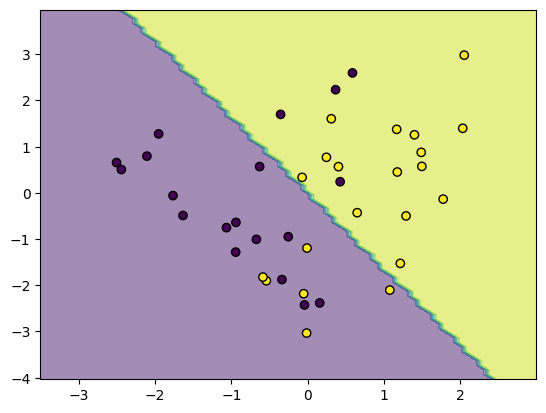

In [32]:
plot_decision_boundary(perceptron, X_test_syn, y_test_syn)

In [33]:
## For our CIFAR DATA, we need to handle multiple classes!

In [34]:
class MultiClassPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.classes_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        
        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)
        
        for c in self.classes_:
            y_binary = np.where(y == c, 1, -1)
            for _ in range(self.n_iters):
                for idx, x_i in enumerate(X):
                    # Convert x_i to np.array if not already
                    x_i = np.array(x_i, dtype=np.float32)
                    linear_output = np.dot(x_i, self.weights[c]) + self.bias[c]
                    if y_binary[idx] * linear_output <= 0:
                        self.weights[c] += self.lr * y_binary[idx] * x_i
                        self.bias[c] += self.lr * y_binary[idx]
                        
    def predict(self, X):
        # Ensure X is a NumPy array
        X = np.array(X, dtype=np.float32)
        linear_outputs = np.dot(X, self.weights.T) + self.bias
        return self.classes_[np.argmax(linear_outputs, axis=1)]


In [35]:
#Convert our tensors to numpy:

X_train_np = X_train.cpu().numpy()
X_test_np = X_test.cpu().numpy()
y_train_np = y_train.cpu().numpy()
y_test_np = y_test.cpu().numpy()

# Initialize and train the model
perceptron = MultiClassPerceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)

# Predict on test data
y_pred = perceptron.predict(X_test)

# Evaluate accuracy
print("Multi-class Perceptron Accuracy:", accuracy_score(y_test, y_pred))

Multi-class Perceptron Accuracy: 0.255


In [36]:
## USING SKLEARN IMPLEMENTATION

In [37]:
linear_clf = LogisticRegression()
linear_clf.fit(X_train_syn, y_train_syn)

# Predicting
y_pred_linear = linear_clf.predict(X_test_syn)

# Evaluation
print("Linear Classifier Accuracy (sklearn):", accuracy_score(y_test_syn, y_pred_linear))
print("Confusion Matrix (Linear Classifier):\n", confusion_matrix(y_test_syn, y_pred_linear))

Linear Classifier Accuracy (sklearn): 0.8
Confusion Matrix (Linear Classifier):
 [[14  5]
 [ 3 18]]


In [42]:
# Prepare data for Scikit-learn
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
def prepare_data(subset):
    images, labels = zip(*subset)
    images = np.array([np.array(img).flatten() for img in images])  # Flatten images
    labels = np.array(labels)
    return images, labels

X_train, y_train = prepare_data(train_subset)
X_test, y_test = prepare_data(test_subset)

# Scale the features (important for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-3, eta0=0.01, n_jobs=-1) # learning rate - eta0, tolerance determines when to stop
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Scikit-learn Perceptron Accuracy:", accuracy_score(y_test, y_pred))

Scikit-learn Perceptron Accuracy: 0.23


## Conclusion
In this tutorial, we:
- Implemented the K-Nearest Neighbors (KNN) algorithm from scratch.
- Implemented a simple linear classifier (perceptron).
- Used `scikit-learn` to build and evaluate both KNN and Linear Classifiers.
- Visualized the decision boundaries of both models.

KNN works by considering the nearest neighbors, while linear classifiers attempt to find a linear decision boundary between the classes.


## TAKE HOME : [10 points]

- Try different learning rate and show the best result

### 1. Learning Rate
The learning rate controls how much we adjust the weights during each update. If the learning rate is too small, the Perceptron may not make significant progress. Conversely, if it's too large, it might overshoot the optimal solution.

**Action:** Experiment with different learning rates to find the optimal value.

### 2. Initialization of Weights
Proper initialization of weights and bias is crucial for the learning process. Poor initialization can lead to slow convergence or failure to converge.

**Action:** Ensure that weights and biases are initialized properly, typically with small random values.

In [50]:
# your code here!
import math

class MultiClassPerceptron:
    def __init__(self, weight_init='zeros', learning_rate=0.01, n_iters=1000):
        self.weight_init = weight_init
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.classes_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        
        if self.weight_init == 'zeros':
            self.weights = np.zeros((n_classes, n_features))
        elif self.weight_init == 'xavier':
            # calculate the range for the weights
            lower , upper = -(1.0 / math.sqrt(n_samples)), (1.0 / math.sqrt(n_samples))
            # randomly pick weights within this range
            # generate random numbers
            numbers = np.random.rand(n_classes, n_features)
            self.weights = lower + numbers * (upper - lower)

        self.bias = np.zeros(n_classes)
        
        for c in self.classes_:
            y_binary = np.where(y == c, 1, -1)
            for _ in range(self.n_iters):
                for idx, x_i in enumerate(X):
                    # Convert x_i to np.array if not already
                    x_i = np.array(x_i, dtype=np.float32)
                    linear_output = np.dot(x_i, self.weights[c]) + self.bias[c]
                    if y_binary[idx] * linear_output <= 0:
                        self.weights[c] += self.lr * y_binary[idx] * x_i
                        self.bias[c] += self.lr * y_binary[idx]
                        
    def predict(self, X):
        # Ensure X is a NumPy array
        X = np.array(X, dtype=np.float32)
        linear_outputs = np.dot(X, self.weights.T) + self.bias
        return self.classes_[np.argmax(linear_outputs, axis=1)]


In [52]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]
weight_inits = ['zeros', 'xavier']
best_weight = None
best_lr = 0
best_accuracy = 0

for lr in learning_rates:
    for weight in weight_inits:
        perceptron = MultiClassPerceptron(weight_init=weight, learning_rate=lr, n_iters=1000)
        perceptron.fit(X_train, y_train)
        y_pred = perceptron.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Learning Rate: {lr}, Weight Initialization: {weight}, Accuracy: {accuracy}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_weight = weight
            best_lr = lr

print(f"Best Learning Rate: {best_lr}, Best Weight Initialization: {best_weight}, Best Accuracy: {best_accuracy}")

Learning Rate: 0.0001, Weight Initialization: zeros, Accuracy: 0.245
Learning Rate: 0.0001, Weight Initialization: xavier, Accuracy: 0.22
Learning Rate: 0.001, Weight Initialization: zeros, Accuracy: 0.245
Learning Rate: 0.001, Weight Initialization: xavier, Accuracy: 0.235
Learning Rate: 0.01, Weight Initialization: zeros, Accuracy: 0.245
Learning Rate: 0.01, Weight Initialization: xavier, Accuracy: 0.2475
Learning Rate: 0.1, Weight Initialization: zeros, Accuracy: 0.245
Learning Rate: 0.1, Weight Initialization: xavier, Accuracy: 0.23
Learning Rate: 0.5, Weight Initialization: zeros, Accuracy: 0.245
Learning Rate: 0.5, Weight Initialization: xavier, Accuracy: 0.235
Best Learning Rate: 0.01, Best Weight Initialization: xavier, Best Accuracy: 0.2475
